**Motivacion de la investigacion**

**Preguntas de Investigacion y objetivos.**

In [5]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
def limpiar(string):
    r = ""
    for i in string:
        if i == "á":
            r += "a"
        elif i== "é":
            r += "e"
        elif i== "í":
            r += "i"
        elif i== "ó":
            r += "o"
        elif i== "ú":
            r += "u"
        else:
            r+=i
    return r

**Dataframe de tipo de institucion educativa preferente por alumnos saliendo de Cuarto Medio**

In [6]:
df_carreras = pd.read_excel('Dataframes/basedefinitivaindices_2005-2022.xlsx')
df_carreras.columns

Index(['Año', 'Cód. Institución', 'Nombre Institución', 'Tipo Institución',
       'Clasificación1', 'Clasificación2', 'Clasificación3', 'Clasificación4',
       'Clasificación5', 'Clasificación6', 'Nombre de la Sede',
       'Comuna donde se imparte la carrera o programa', 'Nombre Region',
       'Orden Geográfico de la Región (Norte aSur)', 'Cód. Carrera',
       'Carrera Genérica', 'Nombre Programa', 'Mención o Especialidad',
       'Horario', 'Tipo Programa', 'Area Conocimiento', 'idgenerocarrera',
       'Tipo Carrera', 'IngresoDirecto', 'Año Inicio Actividades',
       'Nombre del Campus', 'Duración (en semestres)', 'Cód. Campus',
       'Cód. Sede', 'Título', 'Grado Académico',
       'Máximo Puntaje (promedio matemáticas y lenguaje)',
       'Promedio Puntaje (promedio matemáticas y lenguaje)',
       'Mínimo Puntaje (promedio matemáticas y lenguaje)',
       'Puntaje de corte (primer seleccionado)',
       'Puntaje de corte (promedio de la carrera)',
       'Puntaje de corte (

In [7]:
df_col_filtradas = df_carreras[['Año','Nombre Institución','Nombre Region','Tipo Institución','Promedio Puntaje (promedio matemáticas y lenguaje)','Promedio Puntaje NEM','Promedio Puntaje Ranking']]
df_col_filtradas.head()

,Año,Nombre Institución,Nombre Region,Tipo Institución,Promedio Puntaje (promedio matemáticas y lenguaje),Promedio Puntaje NEM,Promedio Puntaje Ranking
0,2022,U. DE CHILE,Región Metropolitana,Univ.,599.0,696.0,733.0
1,2022,U. DE CHILE,Región Metropolitana,Univ.,630.0,739.0,785.0
2,2022,U. DE CHILE,Región Metropolitana,Univ.,682.0,749.0,773.0
3,2022,U. DE CHILE,Región Metropolitana,Univ.,637.0,726.0,766.0
4,2022,U. DE CHILE,Región Metropolitana,Univ.,597.0,697.0,732.0


In [8]:
df_col_filtradas = df_col_filtradas[df_col_filtradas['Nombre Region']=='Región Metropolitana'].reset_index(drop=True)
df_col_filtradas.head()

,Año,Nombre Institución,Nombre Region,Tipo Institución,Promedio Puntaje (promedio matemáticas y lenguaje),Promedio Puntaje NEM,Promedio Puntaje Ranking
0,2022,U. DE CHILE,Región Metropolitana,Univ.,599.0,696.0,733.0
1,2022,U. DE CHILE,Región Metropolitana,Univ.,630.0,739.0,785.0
2,2022,U. DE CHILE,Región Metropolitana,Univ.,682.0,749.0,773.0
3,2022,U. DE CHILE,Región Metropolitana,Univ.,637.0,726.0,766.0
4,2022,U. DE CHILE,Región Metropolitana,Univ.,597.0,697.0,732.0


In [9]:
promedio_institucion = df_col_filtradas.groupby(by='Tipo Institución',as_index=False).mean()
promedio_institucion

,Tipo Institución,Año,Promedio Puntaje (promedio matemáticas y lenguaje),Promedio Puntaje NEM,Promedio Puntaje Ranking
0,C.F.T.,2013.365381,464.544000,505.000000,478.000000
1,F.F.A.A.,2012.524675,579.578947,587.965517,601.045455
2,I.P.,2015.085732,458.729290,506.473684,493.727273
3,Univ.,2014.094611,565.539431,583.689485,613.634250


In [10]:
media_institucion = df_col_filtradas.groupby(by='Tipo Institución',as_index=False).median()
media_institucion

,Tipo Institución,Año,Promedio Puntaje (promedio matemáticas y lenguaje),Promedio Puntaje NEM,Promedio Puntaje Ranking
0,C.F.T.,2013.0,450.0,505.0,478.0
1,F.F.A.A.,2012.0,583.5,577.0,592.5
2,I.P.,2016.0,451.0,519.0,500.0
3,Univ.,2014.0,559.0,566.0,591.0


NameError: name 'x' is not defined

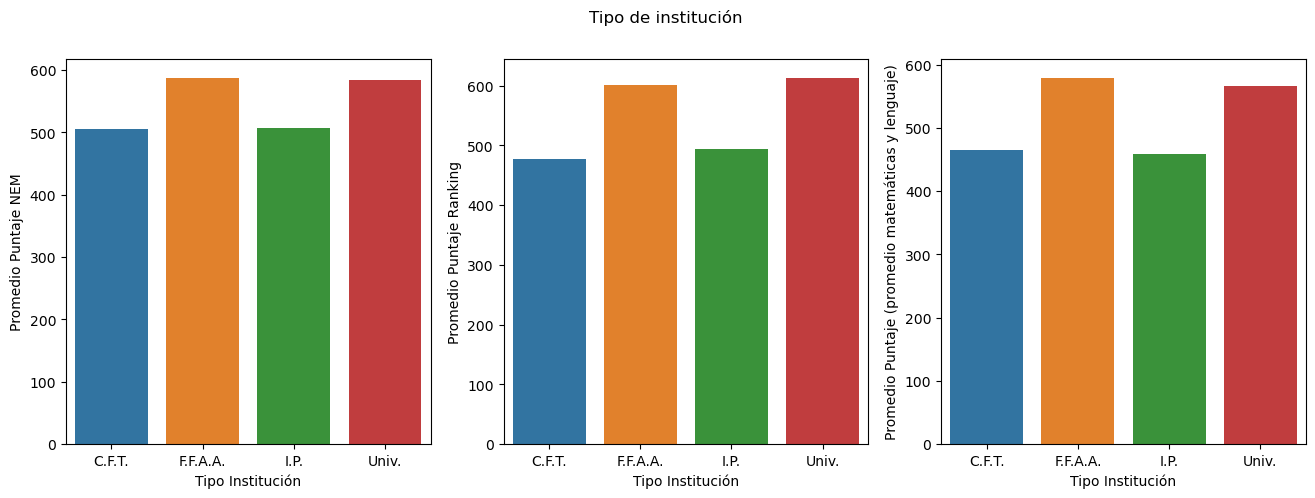

In [11]:
f, ax = plt.subplots(1,3,figsize=(16,5))
f.suptitle("Tipo de institución")
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje NEM', ax=ax[0])
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje Ranking',ax=ax[1])
sns.barplot(data=promedio_institucion, x='Tipo Institución', y='Promedio Puntaje (promedio matemáticas y lenguaje)',ax=ax[2])
x

**Dataframe de Ingresos y rendimiento PSU/Ranking/NEM por comuna**

In [12]:
df_soc = pd.read_csv("Dataframes/Socioeconomico_2022.csv", delimiter=";")
df_soc = df_soc[["NOMBRE_COMUNA_DOMICILIO","INGRESO_PERCAPITA_GRUPO_FA","CUANTOS_TRABAJAN_GRUPO_FAM","CODIGO_REGION_DOMICILIO"]]

df_soc = df_soc[df_soc["CODIGO_REGION_DOMICILIO"] == 13].drop(columns="CODIGO_REGION_DOMICILIO")

df_soc.rename(columns={"NOMBRE_COMUNA_DOMICILIO": "COMUNA", "INGRESO_PERCAPITA_GRUPO_FA":"INGRESOS", "CUANTOS_TRABAJAN_GRUPO_FAM": "N_TRABAJAN"}, inplace=True)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace("99", np.nan)
df_soc["INGRESOS"] = df_soc["INGRESOS"].replace(" ", np.nan)
df_soc.INGRESOS = df_soc.INGRESOS.astype("float32")


df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(16, 0)
df_soc["N_TRABAJAN"] = df_soc["N_TRABAJAN"].replace(99, np.nan)

df_soc_grande = df_soc.copy(deep=True)

df_soc_median = df_soc.groupby(by="COMUNA").median()

df_soc_median.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Dataframes/Socioeconomico_2022.csv'

In [13]:
df = pd.read_csv("Dataframes/Puntajes_2022.csv", delimiter=";")
df[df.CLEC_ACTUAL == " "]
df.columns

FileNotFoundError: [Errno 2] No such file or directory: 'Dataframes/Puntajes_2022.csv'

In [ ]:
df_puntajes = df[["PROMEDIO_NOTAS", "PTJE_RANKING", "CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL", "CIEN_ACTUAL", "NOMBRE_COMUNA_EGRESO", "ANYO_DE_EGRESO", "CODIGO_REGION_EGRESO"]]
df_puntajes = df_puntajes[df_puntajes["CODIGO_REGION_EGRESO"] == 13]
df_puntajes = df_puntajes[df_puntajes["ANYO_DE_EGRESO"] == 2021].reset_index().drop(columns=["CODIGO_REGION_EGRESO", "ANYO_DE_EGRESO", "index"])
df_puntajes.info()
df_puntajes.head()

In [ ]:
l = ["CLEC_ACTUAL", "MATE_ACTUAL", "HCSO_ACTUAL","CIEN_ACTUAL"]
for col in l:
    df_puntajes[col] = df_puntajes[col].replace(" ", np.nan)

    df_puntajes[col] = df_puntajes[col].replace("0", np.nan)


df_puntajes["PROMEDIO_NOTAS"] = df_puntajes["PROMEDIO_NOTAS"].replace(" ", np.nan)
df_puntajes['PROMEDIO_NOTAS'] = df_puntajes['PROMEDIO_NOTAS'].str.replace(',', '.')
df_puntajes = df_puntajes.astype({"CLEC_ACTUAL": "float32","MATE_ACTUAL": "float32","HCSO_ACTUAL": "float32","CIEN_ACTUAL": "float32", "NOMBRE_COMUNA_EGRESO": "category", "PROMEDIO_NOTAS": "float32"})
df_puntajes_grande = df_puntajes
df_puntajes.head()

In [ ]:
df_promedio = df_puntajes.groupby(by="NOMBRE_COMUNA_EGRESO").mean()
df_promedio.reset_index(inplace=True)
df_promedio = df_promedio.rename(columns={"NOMBRE_COMUNA_EGRESO":"COMUNA", "PTJE_RANKING" : "RANKING", "PROMEDIO_NOTAS": "NEM", "CLEC_ACTUAL": "LENGUAJE", "MATE_ACTUAL": "MATEMATICAS", "HCSO_ACTUAL" :"HISTORIA", "CIEN_ACTUAL": "CIENCIAS"})
#df_promedio.to_csv("Dataframes/promedio_puntajes_pdt.csv", sep=",", index=False)


In [ ]:
df_soc.head()

In [ ]:
df_todo = df_promedio.merge(df_soc, on="COMUNA")
df_todo_grande = df_promedio.merge(df_soc_grande, on="COMUNA")
df_todo_grande.head()
df_todo_grande.to_csv("Dataframes/promedio_puntajes_pdt.csv", sep=",", index=False)

In [ ]:
f, ax = plt.subplots(1,6, figsize=(20,10), sharey=True)
sns.set(font_scale=1)
cols = df_promedio.columns[1:]
f.suptitle("PROMEDIO DE PUNTAJES POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,6.5)
ax[0].axvline(5.5)
for i in range(0,6):
    if i != 0:
        ax[i].yaxis.set_visible(False)
        ax[i].set_xlim(350,750)
        ax[i].axvline(650)
        ax[i].axvline(600)
        ax[i].axvline(550)
        ax[i].axvline(500)
    sns.barplot(df_promedio, y="COMUNA", x=cols[i], ax=ax[i],width=1)

In [ ]:
comunas_rm = comunas[comunas["REGION"] == "Metropolitana de Santiago"].reset_index()
comunas_rm = comunas_rm[["COMUNA", "geometry"]]
comunas_rm.COMUNA = comunas_rm.COMUNA.map(lambda x:limpiar(x).upper())
comunas_rm.head()

In [ ]:
prom_rm = df_todo.merge(comunas_rm, on="COMUNA")
prom_rm = gpd.GeoDataFrame(prom_rm)
prom_rm.head()

In [ ]:
f, ax = plt.subplots(2,4, figsize=(20,10))
cols = prom_rm.columns[1:9]
f.suptitle("POR COMUNA")
for i in range(0,2):
    for j in range(0,4):
        ax[i][j].margins(0.0001, 0.0001)
        ax[i][j].set_axis_off()
        ax[i][j].set_title(cols[i*4+j])
        print(cols[i*4+j])
        prom_rm.plot(column=cols[i*4+j], legend=True, ax=ax[i][j], legend_kwds={'orientation': "horizontal"})

**Dataframe de asistencia y promedio por comuna **

In [ ]:
df_rendimiento = pd.read_csv('Dataframes/20220302_Rendimiento_2021_20220131_WEB.csv', sep = ';',  decimal=",")
df_rendimiento

In [ ]:
#Este codigo genera el dataframe filtrado del rendimiento
df_rendimiento = df_rendimiento[df_rendimiento['EDAD_ALU'] != ' ']
df_rendimiento_rm = df_rendimiento[df_rendimiento.COD_REG_RBD == 13]
df_rendimiento_rm = df_rendimiento_rm.loc[(df_rendimiento.EDAD_ALU == 18) | (df_rendimiento.EDAD_ALU == 17)]
df_rendimiento_rm_promedio = df_rendimiento_rm.groupby('NOM_COM_RBD').mean().reset_index()
df_rendimiento_rm_promedio = df_rendimiento_rm_promedio[['COD_COM_RBD','COD_DEPE2' ,'PROM_GRAL', 'ASISTENCIA']]
comunas = df_rendimiento[['COD_COM_RBD', 'NOM_COM_RBD']]
df_final_filtrado = pd.merge(df_rendimiento_rm_promedio, comunas, on = 'COD_COM_RBD')
df_final_filtrado = df_final_filtrado.drop_duplicates().reset_index()
df_final_filtrado = df_final_filtrado[['COD_COM_RBD','COD_DEPE2','PROM_GRAL','ASISTENCIA','NOM_COM_RBD']]
df_final_filtrado

In [ ]:
df_final_filtrado.to_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv',index = False)

**Analisis exploratorio de datos**

In [ ]:
df_filtrado_ploteable = df_final_filtrado[['NOM_COM_RBD', 'ASISTENCIA', 'PROM_GRAL']]
df_filtrado_ploteable=df_filtrado_ploteable.rename(columns = {'NOM_COM_RBD':'COMUNA'})
df_filtrado_ploteable

Notamos que si bien las comunas con mas ingresos son aquellas que estan en el intervalo mas alto de calificaciones en promedio, no necesariamente eso significa que sea debido a la cantidad de ingresos ya que existen otras comunas de menores ingresos que tambien poseen resultados altos.

In [ ]:
f, ax = plt.subplots(1,2, figsize=(20,20), sharey=True)
sns.set(font_scale=1)
cols = df_filtrado_ploteable.columns[1:]
f.suptitle("PROMEDIO DE NOTAS Y ASISTENCIA POR COMUNA")
f.tight_layout()
ax[0].set_xlim(5,100.0)
for i in range(0,2):
    if i != 0:
        if i == 1:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,7)
        else:
            ax[i].yaxis.set_visible(False)
            ax[i].set_xlim(0,200)

            
        
    sns.barplot(df_filtrado_ploteable, y="COMUNA", x=cols[i], ax=ax[i],width=1)

In [ ]:
df_rendimiento = pd.read_csv('Dataframes/rendimiento_promedio_filtrado_2021.csv')
df_psu = pd.read_csv("Dataframes/promedio_puntajes_pdt.csv")

gdf_comunas = gpd.read_file("Dataframes/COMUNA/COMUNAS_2020.shp").to_crs(4326)[["geometry", "COMUNA", "REGION"]]
gdf_comunas = gdf_comunas[gdf_comunas["REGION"] == "Metropolitana de Santiago"]
gdf_comunas.COMUNA = gdf_comunas.COMUNA.map(lambda x:limpiar(x).upper())

df_rendimiento.drop(columns=["COD_COM_RBD", "COD_DEPE2"], inplace=True)
df_rendimiento.rename(columns={"NOM_COM_RBD": "COMUNA"}, inplace=True)
df_rendimiento.COMUNA = df_rendimiento.COMUNA.map(lambda x:limpiar(x).upper())
df_rendimiento.head()

In [ ]:
df_psu = df_psu.groupby('COMUNA').mean().reset_index()
df_psu = df_psu.drop('N_TRABAJAN', axis = 1)
df_psu.head()

In [ ]:
gdf_todo = df_rendimiento.merge(df_psu, on="COMUNA")
gdf_todo = gdf_todo[["COMUNA", "ASISTENCIA", "NEM", "RANKING", "LENGUAJE", "MATEMATICAS", "HISTORIA", "CIENCIAS", "INGRESOS"]]
gdf_todo.head()

**Regresion lineal**

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, Normalizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

Proposito: Predecir si existe una correlacion entre los promedios de rendimiento academico y el nivel de ingreso promedio por comuna. Es decir, ver si existe una correlacion del tipo ' A mejores resultados academicos, mejor condicion economica'

In [15]:
x = gdf_todo.drop(['COMUNA', 'INGRESOS'], axis = 1).values
y = gdf_todo['INGRESOS']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

NameError: name 'gdf_todo' is not defined

In [ ]:
#Estandarizacion de datos
train_mean = x_train.mean()
train_std = x_train.std()

names = gdf_todo.columns.drop(['COMUNA','INGRESOS'])
scaler = StandardScaler()
scaled_train = scaler.fit_transform(x_train)
x_test_standard = (x_test - train_mean) / train_std #scaler.fit_transform(x_test)
x_train_standard = pd.DataFrame(scaled_train, columns=names)

x_train_standard.head()

In [ ]:
#Testear el machine learning

ml = LinearRegression()
ml.fit(x_train, y_train)

#Predecir resultado
y_pred = ml.predict(x_test)

In [ ]:
def regression_results(y_true, y_pred, p):
    explained_variance=explained_variance_score(y_true, y_pred)
    mae=mean_absolute_error(y_true, y_pred) 
    mse=mean_squared_error(y_true, y_pred) 
    r2=r2_score(y_true, y_pred)

    n = y_true.shape[0]
    adjr2 = 1-(1-r2) * (n-1)/(n-p)

    print('Explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('adjr2: ', round(adjr2,4))
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    
#Metricas lieales.
true = y_test.values
pred = y_pred
p = x_test.shape[1]
regression_results(true, pred, p=p)